In [1]:
%load_ext autoreload
%autoreload 2

You can check and explore further methods applied the tasks we have previously covered from the following link:
https://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html#43494641522d313030

Skeleton code is provided from the following tutorial: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

Dataset: https://pytorch.org/docs/stable/_modules/torchvision/datasets/cifar.html#CIFAR100

In [3]:
# TODO: write at least one data transform or augmentation method yourself:
from homework.data.augmented_cifar100 import AugmentedCIFAR100, DatasetType
from homework.data.cifar100_classes import CIFAR100_CLASSES
from homework.model.inzva_net import InzvaNet
from homework.training.train_cifar100 import train_cifar100
import matplotlib.pyplot as plt
import numpy as np

In [4]:
def data_transform_or_augmentation(data): # rename based on your choice
    pass

In [5]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [6]:
# TODO: You may consider appyling more transform such as data augmentation methods, etc.
# TODO: You may consider hyperparameter optimization: in this cell, we have batch_size!
# TODO: use the previously defined data transform/augmentation method in the following transform.

batch_size = 64
train_loader = AugmentedCIFAR100.create_loader(DatasetType.TRAIN, batch_size)
val_loader = AugmentedCIFAR100.create_loader(DatasetType.VAL, batch_size)
test_loader = AugmentedCIFAR100.create_loader(DatasetType.TEST, batch_size)
classes = CIFAR100_CLASSES

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [7]:
# get some random training images
dataiter = iter(train_loader)

torch.Size([64, 3, 32, 32])
torch.Size([64])
tensor([39, 82, 21, 45, 69, 86, 90,  2, 39, 29, 73, 89, 43,  0, 90,  6, 65, 48,
        71, 13, 61, 15, 49, 47, 10, 30, 97, 92, 32, 97, 80, 50, 11,  0, 69, 34,
        44, 30, 88,  3, 67, 89, 77, 50, 55, 12, 11, 53, 48, 92, 22, 65, 92, 55,
        58, 47, 61, 16, 81, 93, 43, 42, 91, 94])


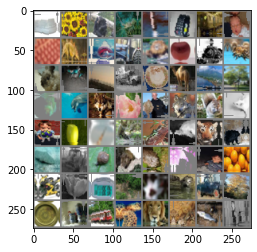

kangaroo sunflowers chimpanzee lobster rocket telephone train  baby kangaroo  cups shark tractor  lion apples train   bee rabbit motorcycle   sea   bus plates camel mountain maple bowls dinosaur  wolf tulips elephant  wolf squirrel mouse   boy apples rocket forest lizard dinosaur tiger  bear   ray tractor snail mouse otter bridge   boy oranges motorcycle tulips clock rabbit tulips otter pickup truck maple plates  cans streetcar turtle  lion leopard trout wardrobe


In [8]:
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
print(labels)
# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))


In [9]:
# if you want to train on GPU:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(device)

cuda:0


In [ ]:
# Training with Efficient Net
from homework.model.efficient_net_pl import EfficientNetPL
from homework.model.efficient_net.efficient_net_factory import EfficientNetFactory, EfficientNetType

model, result = train_cifar100(module_class=EfficientNetPL,
                               model_name="EfficientNetPL",
                               lr=5e-4,
                               efficient_net_type=EfficientNetType.B7,
                               output_size=len(CIFAR100_CLASSES),
                               use_package_implementation=False,
                               train_loader=train_loader,
                               val_loader=val_loader,
                               test_loader=test_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type         | Params
---------------------------------------------
0 | inner_model | EfficientNet | 64.2 M
---------------------------------------------
64.2 M    Trainable params
0         Non-trainable params
64.2 M    Total params
256.794   Total estimated model params size (MB)


In [ ]:
from homework.model.efficient_net.efficient_net_mini import EfficientNetMini

# Training with EfficientNet Mini

model, result = train_cifar100(module_class=EfficientNetMini,
                               model_name="EfficientNetMini",
                               lr=1e-3,
                               train_loader=train_loader,
                               val_loader=val_loader,
                               test_loader=test_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name     | Type           | Params
--------------------------------------------
0 | stem     | ConvBNActBlock | 960   
1 | stages   | Sequential     | 1.1 M 
2 | pre_head | ConvBNActBlock | 249 K 
3 | head     | Sequential     | 128 K 
--------------------------------------------
1.5 M     Trainable params
0         Non-trainable params
1.5 M     Total params
5.963     Total estimated model params size (MB)


In [11]:
# Training with InzvaNet
model, result = train_cifar100(module_class=InzvaNet,
                               model_name="InzvaNet",
                               lr=5e-4,
                               train_loader=train_loader,
                               val_loader=val_loader,
                               test_loader=test_loader)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name  | Type      | Params
------------------------------------
0 | conv1 | Conv2d    | 1.2 K 
1 | pool  | MaxPool2d | 0     
2 | conv2 | Conv2d    | 12.8 K
3 | fc1   | Linear    | 160 K 
4 | fc2   | Linear    | 25.7 K
5 | fc3   | Linear    | 12.9 K
------------------------------------
212 K     Trainable params
0         Non-trainable params
212 K     Total params
0.852     Total estimated model params size (MB)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


/home/gsoykan20/.local/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Your test_dataloader has `shuffle=True`, it is best practice to turn this off for val/test/predict dataloaders.
  warnings.warn(*args, **kwargs)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


In [12]:
print("Train accuracy: %4.2f%%" % (100.0 * result["train_acc"]))
print("Val accuracy:   %4.2f%%" % (100.0*result["val_acc"]))
print("Test accuracy:  %4.2f%%" % (100.0 * result["test_acc"]))

Train accuracy: 21.08%
Val accuracy:   27.40%
Test accuracy:  26.58%


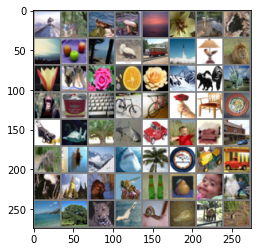

GroundTruth:  mountain flatfish  seal mushrooms   sea tulips camel butterfly cloud apples   sea skunk streetcar rocket  lamp  lion tulips  wolf roses oranges roses mountain skunk  cups chimpanzee  cans kangaroo bicycle bicycle roses chair plates lawn-mower turtle  palm shark pickup truck   boy computer keyboard hamster porcupine cockroach mountain shark  palm clock lawn-mower pickup truck skunk castle beaver   bee bottles pears  baby elephant   sea   oak leopard rocket snail  crab camel rabbit
Predicted:   road flatfish otter mushrooms   sea beetle rabbit shrew cloud sweet peppers television skunk streetcar rocket  lamp  lion tulips  wolf roses poppies roses mountain sweet peppers willow chimpanzee  cans kangaroo bicycle bicycle lobster chair clock lawn-mower shark  cups  crab lawn-mower   boy computer keyboard   bus porcupine caterpillar elephant dinosaur  palm clock lawn-mower pickup truck lobster  pine beaver   bee bottles pears   fox   fox   sea   oak leopard rocket  worm  crab cam

In [12]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

outputs = model(images.to(device))
_, predicted = torch.max(outputs.data, 1)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]for j in range(batch_size)))

In [13]:
# test on all test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(correct)
print(total)
print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))

5552
10000
Accuracy of the network on the 10000 test images: 55 %


In [14]:
# class-wise accuracy
class_correct = list(0. for i in range(100))
class_total = list(0. for i in range(100))
with torch.no_grad():
    for data in test_loader:
        if len(data[0]) != batch_size:
            pass
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(len(data[0])):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(100):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of apples : 75 %
Accuracy of aquarium fish : 68 %
Accuracy of  baby : 35 %
Accuracy of  bear : 46 %
Accuracy of beaver : 50 %
Accuracy of   bed : 61 %
Accuracy of   bee : 39 %
Accuracy of beetle : 61 %
Accuracy of bicycle : 71 %
Accuracy of bottles : 59 %
Accuracy of bowls : 24 %
Accuracy of   boy : 38 %
Accuracy of bridge : 56 %
Accuracy of   bus : 45 %
Accuracy of butterfly : 40 %
Accuracy of camel : 68 %
Accuracy of  cans : 67 %
Accuracy of castle : 74 %
Accuracy of caterpillar : 48 %
Accuracy of cattle : 43 %
Accuracy of chair : 75 %
Accuracy of chimpanzee : 79 %
Accuracy of clock : 45 %
Accuracy of cloud : 76 %
Accuracy of cockroach : 73 %
Accuracy of computer keyboard : 43 %
Accuracy of couch : 46 %
Accuracy of  crab : 37 %
Accuracy of crocodile : 72 %
Accuracy of  cups : 55 %
Accuracy of dinosaur : 52 %
Accuracy of dolphin : 61 %
Accuracy of elephant : 56 %
Accuracy of flatfish : 50 %
Accuracy of forest : 49 %
Accuracy of   fox : 34 %
Accuracy of  girl : 55 %
Accuracy o